In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy.stats import ttest_rel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
data = pd.read_csv('/Users/mh/Desktop/201955_DS_Final/forestfires.csv')

In [3]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [6]:
# performing label encoding on the 'month' column
# Initialize LabelEncoder
label_encoder = LabelEncoder()


data['month'] = label_encoder.fit_transform(data['month'])

In [7]:
# performing label encoding on the 'days' column
# Initialize LabelEncoder
label_encoder = LabelEncoder()


data['day'] = label_encoder.fit_transform(data['day'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


In [9]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [10]:
data.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,5.758221,2.736944,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,4.373275,1.925061,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,1.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,3.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,11.000000,4.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


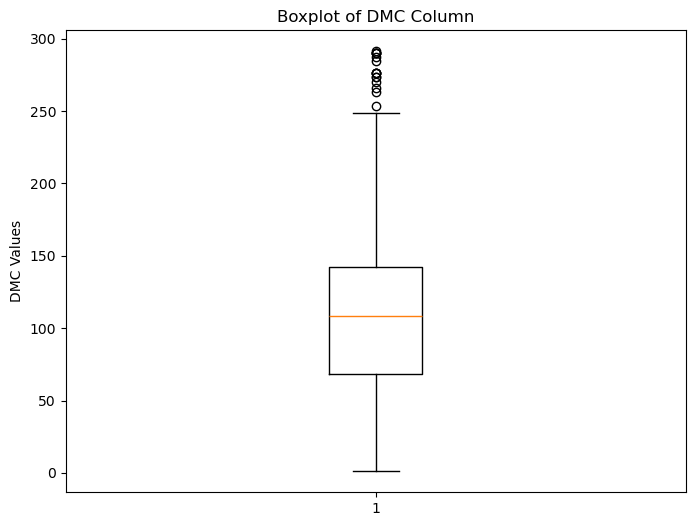

Interquartile Range (IQR): 73.80000000000001
Lower Bound: -42.10000000000002
Upper Bound: 253.10000000000002


In [11]:
import matplotlib.pyplot as plt


# Calculate IQR
Q1 = data['DMC'].quantile(0.25)
Q3 = data['DMC'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = data[(data['DMC'] < lower_bound) | (data['DMC'] > upper_bound)]

# Plot boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data['DMC'])
plt.title('Boxplot of DMC Column')
plt.ylabel('DMC Values')
plt.show()

print("Interquartile Range (IQR):", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


In [12]:
# Replace values greater than upper bound with median
median = data['DMC'].median()
data['DMC'] = data['DMC'].apply(lambda x: median if x > upper_bound else x)

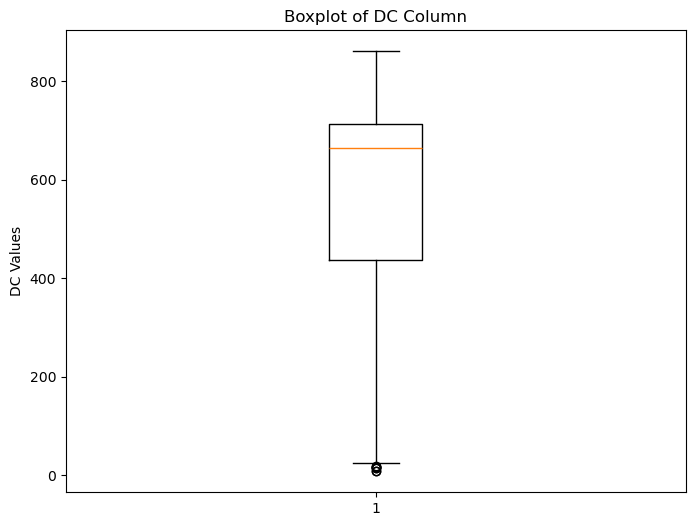

Interquartile Range (IQR): 276.2
Lower Bound: 23.400000000000034
Upper Bound: 1128.1999999999998


In [13]:
# Calculate IQR
Q1 = data['DC'].quantile(0.25)
Q3 = data['DC'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = data[(data['DC'] < lower_bound) | (data['DC'] > upper_bound)]

# Plot boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data['DC'])
plt.title('Boxplot of DC Column')
plt.ylabel('DC Values')
plt.show()

print("Interquartile Range (IQR):", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

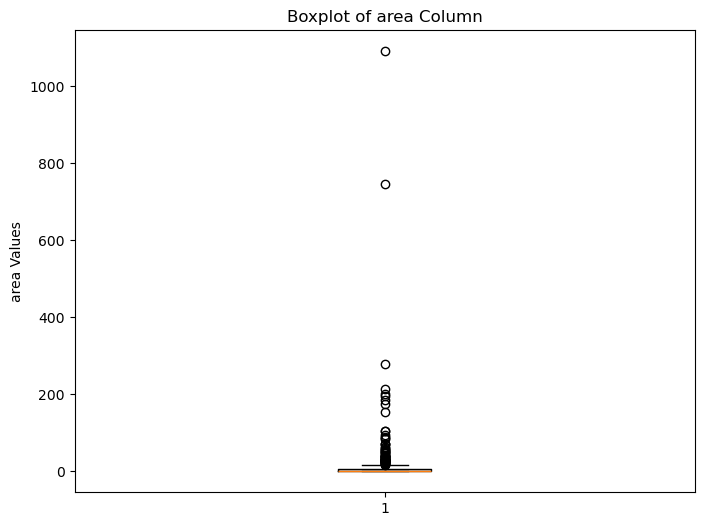

Interquartile Range (IQR): 6.57
Lower Bound: -9.855
Upper Bound: 16.425


In [14]:
# Calculate IQR
Q1 = data['area'].quantile(0.25)
Q3 = data['area'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = data[(data['area'] < lower_bound) | (data['area'] > upper_bound)]

# Plot boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data['area'])
plt.title('Boxplot of area Column')
plt.ylabel('area Values')
plt.show()

print("Interquartile Range (IQR):", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

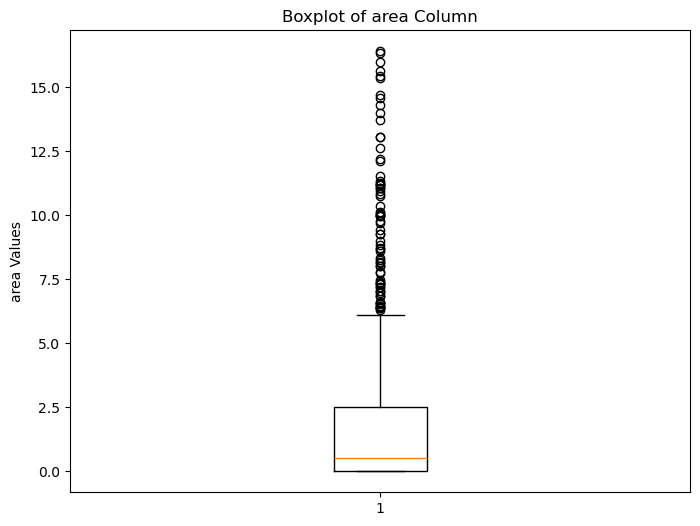

Interquartile Range (IQR): 6.57
Lower Bound: -9.855
Upper Bound: 16.425


In [15]:

# Calculate IQR
Q1 = data['area'].quantile(0.25)
Q3 = data['area'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace values greater than upper bound and less than lower bound with median
median = data['area'].median()
data['area'] = data['area'].apply(lambda x: median if (x > upper_bound or x < lower_bound) else x)

# Plot boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data['area'])
plt.title('Boxplot of area Column')
plt.ylabel('area Values')
plt.show()

print("Interquartile Range (IQR):", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


RMSE on Training Set: 3.531150203725931
RMSE on Testing Set: 3.6855231672922857
Variables to Omit based on P-values: ['const', 'X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind']


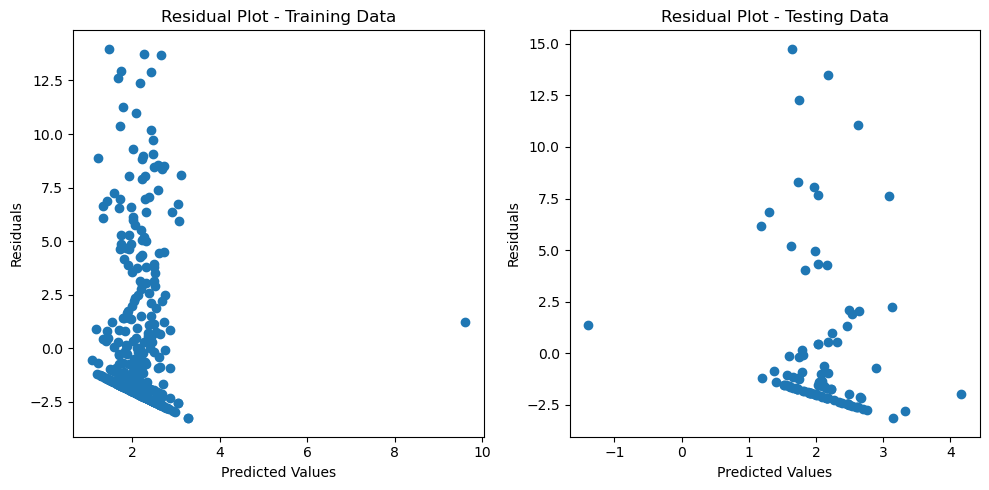

In [16]:
# Split the data into features X and target y
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Split the data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform multi-regression analysis
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Compute RMSE on training and testing sets
y_pred_train = model.predict(sm.add_constant(X_train))
y_pred_test = model.predict(sm.add_constant(X_test))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Print RMSE
print("RMSE on Training Set:", rmse_train)
print("RMSE on Testing Set:", rmse_test)

# Identify variables to omit based on p-values
p_values = model.pvalues
variables_to_omit = p_values[p_values > 0.05].index.tolist()
print("Variables to Omit based on P-values:", variables_to_omit)

# Plot Residuals
plt.figure(figsize=(10, 5))

# Residual plot for training data
plt.subplot(1, 2, 1)
plt.scatter(y_pred_train, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Training Data')

# Residual plot for testing data
plt.subplot(1, 2, 2)
plt.scatter(y_pred_test, y_test - y_pred_test)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Testing Data')

plt.tight_layout()
plt.show()


In [27]:
import statsmodels.api as sm


# Fit the model
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Get the p-values of the variables
p_values = model.pvalues

# Omit variables with p-values greater than 0.05
variables_to_omit = p_values[p_values > 0.05].index
variables_to_omit = variables_to_omit.drop('const', errors='ignore')  # Exclude 'const' column if present
X_train_new = X_train.drop(variables_to_omit, axis=1)
X_test_new = X_test.drop(variables_to_omit, axis=1)

# Fit the model with omitted variables
model_new = sm.OLS(y_train, sm.add_constant(X_train_new)).fit()

# Compute predictions before omission
y_pred_train_before = model.predict(sm.add_constant(X_train))
y_pred_test_before = model.predict(sm.add_constant(X_test))

# Compute predictions after omission
y_pred_train_after = model_new.predict(sm.add_constant(X_train_new))
y_pred_test_after = model_new.predict(sm.add_constant(X_test_new))

# Ensure all arrays have the same length
min_length = min(len(y_pred_train_before), len(y_pred_test_before), len(y_pred_train_after), len(y_pred_test_after))
y_pred_train_before = y_pred_train_before[:min_length]
y_pred_test_before = y_pred_test_before[:min_length]
y_pred_train_after = y_pred_train_after[:min_length]
y_pred_test_after = y_pred_test_after[:min_length]

# Perform t-test on predictions before omission
t_statistic_before, p_value_before = ttest_rel(y_pred_train_before, y_pred_test_before)

# Print t-test results before omission
print("T-Statistic before omission:", t_statistic_before)
print("P-Value before omission:", p_values) 

# Save predictions to CSV file
predictions_df = pd.DataFrame({
    'y_pred_train_before': y_pred_train_before,
    'y_pred_test_before': y_pred_test_before,
    'y_pred_train_after': y_pred_train_after,
    'y_pred_test_after': y_pred_test_after
})

predictions_df.to_csv('predictions.csv', index=False)


T-Statistic before omission: 0.8339382716409952
P-Value before omission: const    0.868921
X        0.692862
Y        0.373499
month    0.579636
day      0.560139
FFMC     0.711772
DMC      0.986294
DC       0.202042
ISI      0.334666
temp     0.461822
RH       0.793925
wind     0.528613
rain     0.034931
dtype: float64


In [29]:
# Convert predicted values to DataFrame
predicted_df = pd.DataFrame({'Predicted': y_pred_test})

# Save DataFrame to CSV file
predicted_df.to_csv('Task_4_predicted_values.csv', index=False)